In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import fcluster   


In [15]:
rfm_df= pd.read_csv('rfm_df.csv')
rfm_df.head(3)

,Unnamed: 0,Member_number,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
0,1388,2433,3,7,375.31,4,4,4,444,12,Best Customers
1,1159,2193,91,11,361.45,3,4,4,344,11,Big Spenders
2,772,1793,26,10,345.10,4,4,4,444,12,Best Customers


## RFM + Hierarchical Clustering

In [16]:
rfm_data = rfm_df[['Recency', 'Frequency', 'Monetary']]

In [17]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

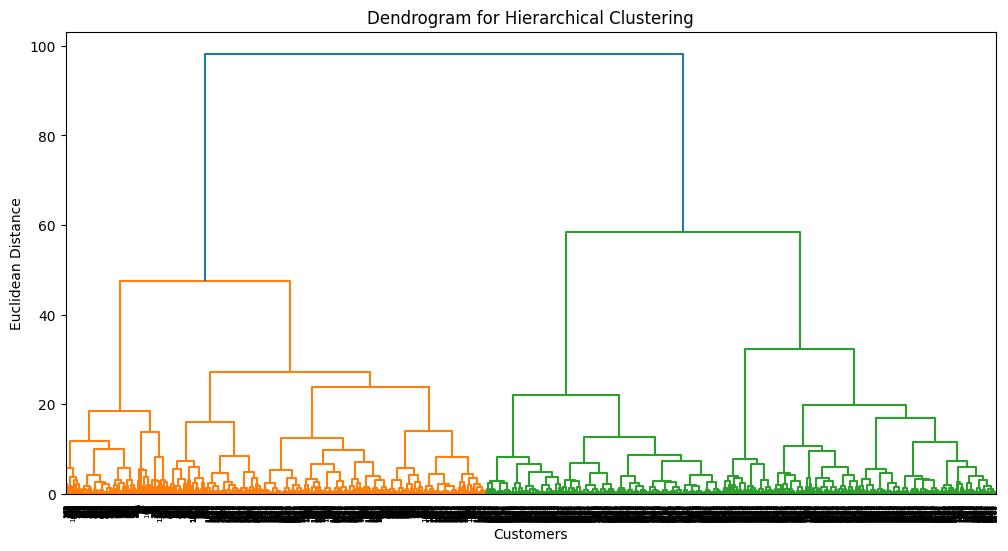

In [18]:
# Vẽ dendrogram để xác định số cụm tối ưu
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [19]:
# Chọn số cụm hợp lý dựa trên dendrogram (thường là 4-6 cụm)
num_clusters = 4  

In [20]:
# Phân cụm sử dụng Hierarchical Clustering
clusters = fcluster(sch.linkage(rfm_scaled, method='ward'), num_clusters, criterion='maxclust')


In [21]:
# Gán nhãn cụm vào DataFrame
rfm_df['Cluster'] = clusters

In [22]:
# Hiển thị số lượng khách hàng trong mỗi cụm
rfm_df['Cluster'].value_counts()

Cluster
2    1328
4    1145
3     990
1     435
Name: count, dtype: int64

In [24]:
# Tính giá trị trung bình của mỗi cụm
rfm_cluster_analysis = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
rfm_cluster_analysis

,Recency,Frequency,Monetary
Cluster,,,
1,89.558621,7.085057,187.906713
2,125.822289,4.797440,111.076950
3,95.618182,2.929293,51.245283
4,376.373799,2.279476,45.569598


Cụm 1: Khách hàng có Recency thấp (gần đây mua hàng), tần suất mua cao, và chi tiêu nhiều → Khách hàng VIP.

Cụm 2: Khách hàng có Recency cao hơn, tần suất trung bình, chi tiêu trung bình → Khách hàng tiềm năng.

Cụm 3: Khách hàng có Recency trung bình, tần suất mua thấp, chi tiêu thấp → Khách hàng không thường xuyên.

Cụm 4: Khách hàng có Recency rất cao (lâu rồi chưa mua), tần suất mua thấp nhất, chi tiêu thấp nhất → Khách hàng đã rời bỏ.

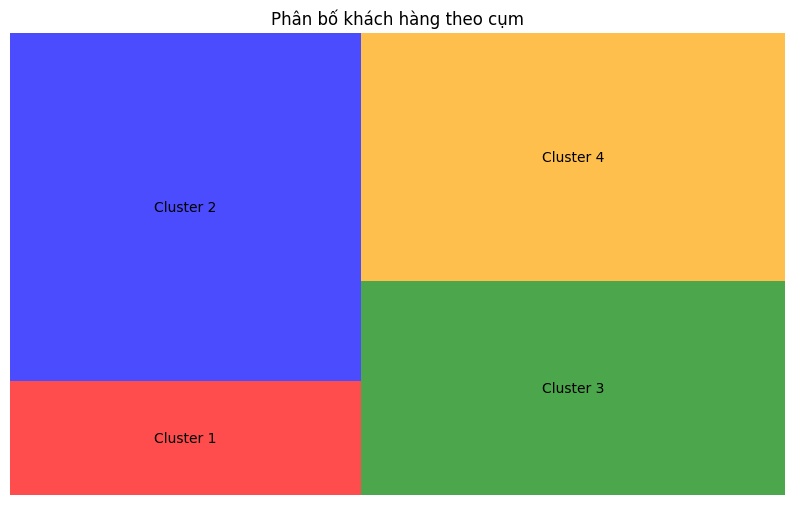

In [25]:
import squarify  
import matplotlib.pyplot as plt  

# Tính tổng số khách hàng trong mỗi cụm
cluster_sizes = rfm_df['Cluster'].value_counts().sort_index()

# Vẽ Treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=cluster_sizes, label=[f'Cluster {i}' for i in cluster_sizes.index], alpha=0.7, color=['red', 'blue', 'green', 'orange'])

plt.title("Phân bố khách hàng theo cụm")
plt.axis("off")  # Ẩn trục
plt.show()
